In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/device_3_dataset.csv')

In [ ]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.00000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,benign
1,1.000000,70.000000,0.00000,1.000000,70.000000,0.000000e+00,1.000000,70.000000,0.000000e+00,1.000000,...,0.0,0.0,1.000000,70.000000,0.000000e+00,70.000000,0.000000e+00,0.0,0.0,benign
2,1.000023,89.999548,0.00904,1.001631,89.967432,6.503024e-01,1.117713,87.893685,3.768974e+01,1.807388,...,0.0,0.0,1.000000,90.000000,0.000000e+00,90.000000,0.000000e+00,0.0,0.0,benign
3,1.000000,60.000000,0.00000,1.000000,60.000000,4.550000e-13,1.000091,60.000000,4.550000e-13,1.394277,...,0.0,0.0,1.911130,60.000000,9.540000e-07,60.000000,9.090000e-13,0.0,0.0,benign
4,1.000000,590.000000,0.00000,1.000000,590.000000,0.000000e+00,1.000000,590.000000,0.000000e+00,1.000000,...,0.0,0.0,4.274029,399.892026,1.050783e+02,399.892026,1.104145e+04,0.0,0.0,benign


In [ ]:
data.groupby('type')['type'].count()

type
benign           39100
gafgyt_combo     53014
gafgyt_junk      29797
gafgyt_scan      28120
gafgyt_tcp      101536
gafgyt_udp      103933
Name: type, dtype: int64

In [ ]:
data.drop(data[data["type"] == "gafgyt_udp"].index, inplace = True)
data.drop(data[data["type"] == "gafgyt_tcp"].index, inplace = True)

In [ ]:
data.groupby('type')['type'].count()

type
benign          39100
gafgyt_combo    53014
gafgyt_junk     29797
gafgyt_scan     28120
Name: type, dtype: int64

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [ ]:
from collections import Counter
print(sorted(Counter(y).items()))

[('benign', 28120), ('gafgyt_combo', 28120), ('gafgyt_junk', 28120), ('gafgyt_scan', 28120)]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(112480, 115, 1)


In [ ]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM


In [ ]:
#Create model
model = Sequential()
model.add(LSTM(40, activation='relu',input_shape=(115,1,),return_sequences=True))    # the batch size is neglected!
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 115, 40)           6720      
                                                                 
 lstm_1 (LSTM)               (None, 115, 16)           3648      
                                                                 
 flatten (Flatten)           (None, 1840)              0         
                                                                 
 dense (Dense)               (None, 128)               235648    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 254,532
Trainable params: 254,532
Non-trai

In [ ]:
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
2812/2812 [==============================] - 200s 70ms/step - loss: 0.1479 - accuracy: 0.9350 - val_loss: 0.0679 - val_accuracy: 0.9660
Epoch 2/10
2812/2812 [==============================] - 194s 69ms/step - loss: 0.0535 - accuracy: 0.9781 - val_loss: 0.0333 - val_accuracy: 0.9881
Epoch 3/10
2812/2812 [==============================] - 193s 69ms/step - loss: 0.0333 - accuracy: 0.9869 - val_loss: 0.0273 - val_accuracy: 0.9889
Epoch 4/10
2812/2812 [==============================] - 194s 69ms/step - loss: 0.0277 - accuracy: 0.9890 - val_loss: 0.0235 - val_accuracy: 0.9898
Epoch 5/10
2812/2812 [==============================] - 194s 69ms/step - loss: 0.0273 - accuracy: 0.9893 - val_loss: 0.0227 - val_accuracy: 0.9906
Epoch 6/10
2812/2812 [==============================] - 197s 70ms/step - loss: 0.0252 - accuracy: 0.9903 - val_loss: 0.0220 - val_accuracy: 0.9890
Epoch 7/10
2812/2812 [==============================] - 196s 70ms/step - loss: 0.0245 - accuracy: 0.9899 - val_loss: 0

In [ ]:
y_pred=model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.9897315078236131
MCC        : 0.9864344694242084


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5569
           1       1.00      0.96      0.98      5723
           2       0.96      1.00      0.98      5707
           3       1.00      1.00      1.00      5497

    accuracy                           0.99     22496
   macro avg       0.99      0.99      0.99     22496
weighted avg       0.99      0.99      0.99     22496



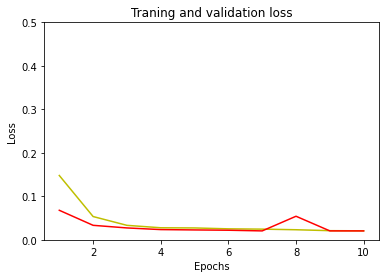

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'y',label='Tranning loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.show()

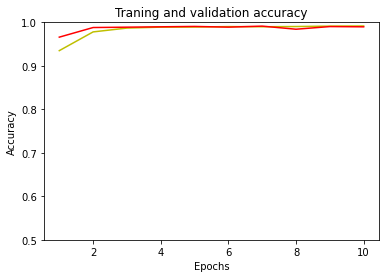

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Traning and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.show()

[[5566    2    0    1]
 [   0 5499  224    0]
 [   1    1 5704    1]
 [   1    0    0 5496]]


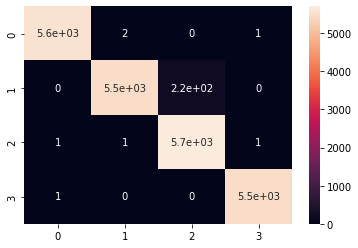

In [ ]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)